In [2]:
import sys
sys.path.append("..")
import re
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm import tqdm
from glob import glob
from matplotlib import pyplot as plt
from utils.utils import getHashFromDict, readContentFromFile
from concurrent.futures import ProcessPoolExecutor, as_completed
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")

In [3]:
EXPERIMENTS_BASE_PATH = f"./experiments/noisyTransferLearning"
experimentsDirPathList = glob(f"{EXPERIMENTS_BASE_PATH}/*/*/*/*")

In [4]:
# def calculateUtility(experimentId, targetUtilityAlphaList):
#     foldPredictionPathList = glob(f"{EXPERIMENTS_BASE_PATH}-*/{experimentId}/**/aucTemp.txt", recursive = True)
#     utilities = []
#     for predictionPath in foldPredictionPathList:
#         fold = re.findall(r".*(fold[0-9]+).*", predictionPath)[0]
#         foldUtilities = []
#         for targetUtilityAlpha in targetUtilityAlphaList:
#             oneMinusTargetUtilityAlpha = 1 - targetUtilityAlpha
#             foldPredictions = readContentFromFile(predictionPath).strip()
#             foldPredictions = pd.DataFrame([
#                 [float(value) for value in instance.split(" ")] for instance in foldPredictions.split("\n")
#             ], columns = ["prob", "label"])
#             foldPredictions["label"] = foldPredictions.label.astype(int)
#             foldPredictions["pmf"] = foldPredictions.apply(lambda row: row.prob if row.label == 1 else (1-row.prob), axis = 1)
#             foldPredictions["alphaFairness"] = foldPredictions.pmf.apply(lambda z: np.log(z) if targetUtilityAlpha == 1 else np.power(z,oneMinusTargetUtilityAlpha)/oneMinusTargetUtilityAlpha)
#             foldUtility = foldPredictions.alphaFairness.mean()
#             foldUtilities.append(foldUtility)
#         utilities.append([experimentId, fold, *foldUtilities])
#     return pd.DataFrame(data = utilities, columns = ["experimentID", "fold", *[f"utility@targetAlpha_{alpha}" for alpha in targetUtilityAlphaList]])

In [5]:
def process_experiment(path):
    experimentId = os.path.basename(path)
    dirName = os.path.dirname(path)
    result = None
    if len(experimentId) == 64:
        try:
            with open(f"{dirName}/{experimentId}/setting.json") as f:
                experimentSetting = json.load(f)
            with open(f"{dirName}/{experimentId}/metrics.json") as f:
                experimentMetrics = {"metrics": json.load(f)}
            result = {
                "id": experimentId,
                **experimentSetting,
                **experimentMetrics
            }
        except Exception as e:
            print(f"Error while loading {experimentId} results.")
            print(e)
            return (path, None)
    return (None, result)

errorExperimentsPathList = []
experimentsResults = []

with ProcessPoolExecutor() as executor:
    futures = {executor.submit(process_experiment, path): path for path in experimentsDirPathList}
    for future in tqdm(as_completed(futures), total=len(futures), desc="Processing experiments"):
        path, result = future.result()
        if path:
            errorExperimentsPathList.append(path)
        if result:
            experimentsResults.append(result)

len(experimentsResults)

Processing experiments:  27%|██▋       | 3598/13174 [00:09<00:26, 357.80it/s]

Error while loading f83d388a6e544f7a92e2e844ac62914a3a7faf71b5de2c4dd60217b3ecb0670b results.
[Errno 2] No such file or directory: './experiments/noisyTransferLearning/nell_finances/beta-1/randomSeed-1/f83d388a6e544f7a92e2e844ac62914a3a7faf71b5de2c4dd60217b3ecb0670b/metrics.json'


Processing experiments:  92%|█████████▏| 12085/13174 [00:32<00:02, 404.71it/s]

Error while loading 13503061cd108707c044b1a46370feae42f2bc6a2069e5c724490a8e5e4bfb89 results.
[Errno 2] No such file or directory: './experiments/noisyTransferLearning/yeast/beta-1/randomSeed-1/13503061cd108707c044b1a46370feae42f2bc6a2069e5c724490a8e5e4bfb89/metrics.json'


Processing experiments:  95%|█████████▍| 12456/13174 [00:33<00:01, 397.35it/s]

Error while loading 0fc4854bf81f652434a0bc972819fd500b2625b8444358295f9f05d3493a8971 results.
[Errno 2] No such file or directory: './experiments/noisyTransferLearning/yeast/beta-1/randomSeed-13/0fc4854bf81f652434a0bc972819fd500b2625b8444358295f9f05d3493a8971/metrics.json'
Error while loading 2577398ab32c1f8665164a619fc20ffaafb362b529eab0f40b6546d7c0efd9a9 results.
[Errno 2] No such file or directory: './experiments/noisyTransferLearning/yeast/beta-1/randomSeed-13/2577398ab32c1f8665164a619fc20ffaafb362b529eab0f40b6546d7c0efd9a9/metrics.json'


Processing experiments:  97%|█████████▋| 12757/13174 [00:34<00:00, 422.55it/s]

Error while loading edff3246491ce4c11d2cf725950691bfdd9d53d89c5a7e97e5d60c08bb60374a results.
[Errno 2] No such file or directory: './experiments/noisyTransferLearning/yeast/beta-1/randomSeed-13/edff3246491ce4c11d2cf725950691bfdd9d53d89c5a7e97e5d60c08bb60374a/metrics.json'


Processing experiments: 100%|██████████| 13174/13174 [00:35<00:00, 376.13it/s]


13168

In [6]:
len(errorExperimentsPathList), errorExperimentsPathList[:10]

(5,
 ['./experiments/noisyTransferLearning/nell_finances/beta-1/randomSeed-1/f83d388a6e544f7a92e2e844ac62914a3a7faf71b5de2c4dd60217b3ecb0670b',
  './experiments/noisyTransferLearning/yeast/beta-1/randomSeed-1/13503061cd108707c044b1a46370feae42f2bc6a2069e5c724490a8e5e4bfb89',
  './experiments/noisyTransferLearning/yeast/beta-1/randomSeed-13/0fc4854bf81f652434a0bc972819fd500b2625b8444358295f9f05d3493a8971',
  './experiments/noisyTransferLearning/yeast/beta-1/randomSeed-13/2577398ab32c1f8665164a619fc20ffaafb362b529eab0f40b6546d7c0efd9a9',
  './experiments/noisyTransferLearning/yeast/beta-1/randomSeed-13/edff3246491ce4c11d2cf725950691bfdd9d53d89c5a7e97e5d60c08bb60374a'])

In [7]:
experimentsResultsDF = pd.DataFrame.from_dict(experimentsResults)

experimentsResultsDF["databasePath"] = experimentsResultsDF.databasePath.apply(lambda databasePath: os.path.basename(databasePath))
experimentsResultsDF = experimentsResultsDF.rename(columns = {"metrics": "metrics_transferLearning", "databasePath": "database"})
experimentsResultsDF = experimentsResultsDF.drop(["ignoreSTDOUT"], axis = 1)

# experimentsResultsDF["target_targetPredicate"] = experimentsResultsDF.apply(
#     lambda row: re.findall(
#         r"targetPred:\s+(\w.*)/\d+", 
#         readContentFromFile(glob(f"{row.path}/{row.id}/**/train_output.txt", recursive = True)[0])
#     )[0], 
#     axis = 1
# )

totalExperiments = experimentsResultsDF.shape[0]
print("Total experiments:", totalExperiments)

Total experiments: 13168


In [8]:
experimentsResultsDF = experimentsResultsDF[experimentsResultsDF["metrics_transferLearning"].apply(lambda x: x != {})]
print(f"{experimentsResultsDF.shape[0]} experiments without error out of {totalExperiments} experiments.\n")
print(experimentsResultsDF.shape)
experimentsResultsDF.head(3)

13054 experiments without error out of 13168 experiments.

(13054, 22)


id  numberOfClauses  \
0  00548f7378897847c84c061941af7d78e40018fba068eb...                8   
1  011c21d69f94bde47003b9470b17df05ab7108c5365b80...                8   
2  01ca72aa35bf30aae69d5889a7ae9d90c9f58843b4564e...                8   

   numberOfCycles  maxTreeDepth  nEstimators  nodeSize  negPosRatio  \
0             100             3           10         2            2   
1             100             3           10         2            2   
2             100             3           10         2            2   

   maxFailedNegSamplingRetries  trainNSplits  trainSourceSplits  ...  \
0                           50             5                  4  ...   
1                           50             5                  4  ...   
2                           50             5                  4  ...   

  resetTargetPredicate useRecursion  sourceUtilityAlpha  targetUtilityAlpha  \
0                False         True                 1.0                 0.6   
1                False         True                 0.0                 1.0   
2                False         True                 0.3                 0.3   

   utilityAlphaSetIter                                             weight  \
0                    1  {'strategy': 'balancedInstanceGroupUniform', '...   
1                    1  {'strategy': 'balancedInstanceGroupUniform', '...   
2                    1  {'strategy': 'balancedInstanceGroupUniform', '...   

   noiseStrength                                               path  \
0        0.00004  ./experiments/noisyTransferLearning/nell_finan...   
1        0.01024  ./experiments/noisyTransferLearning/nell_finan...   
2        0.00016  ./experiments/noisyTransferLearning-onlyNELLFi...   

   randomSeed                           metrics_transferLearning  
0           0  {'fold00': {'threshold': '0.160', 'cll': '-0.6...  
1           0  {'fold00': {'threshold': '0.244', 'cll': '-0.5...  
2           0  {'fold00': {'threshold': '0.178', 'cll': '-0.5...  

[3 rows x 22 columns]

In [9]:
experimentsResultsDF["weight"] = experimentsResultsDF["weight"].apply(
    lambda weight: weight if weight["strategy"] == "balancedInstanceGroupUniform" else {
        'strategy': 'balancedInstanceGroupUniform',
        'parameters': {'balanceStrength': 0}
    } if weight["strategy"] == "scalar" else np.nan
)

In [10]:
experimentsResultsDF["beta"] = experimentsResultsDF.weight.apply(
    lambda weight: weight["parameters"]["balanceStrength"]
)

In [11]:
groupColumns = ["database", "beta", "randomSeed"]
totalDF = pd.DataFrame(experimentsResultsDF[groupColumns].groupby(groupColumns).value_counts())
totalDF.columns = ["finished"]
totalDF["pending"] = 375 - totalDF["finished"]
totalDF

finished  pending
database      beta randomSeed                   
nell_finances 0.0  0                375        0
                   1                375        0
                   13               375        0
                   14               375        0
              0.5  0                375        0
                   1                375        0
                   13               375        0
                   14               375        0
              1.0  0                298       77
                   1                351       24
                   13               268      107
                   14               273      102
nell_sports   0.0  0                375        0
                   1                375        0
                   13               375        0
                   14               375        0
              0.5  0                375        0
                   1                375        0
                   13               375        0
                   14               375        0
              1.0  0                375        0
                   1                375        0
                   13               375        0
                   14               375        0
yeast         0.0  0                375        0
                   1                375        0
                   13               375        0
                   14               375        0
              0.5  0                375        0
                   1                375        0
                   13               375        0
                   14               375        0
              1.0  0                310       65
                   1                374        1
                   13               354       21
                   14               326       49

In [12]:
totalDF.sort_values("pending", ascending = False)

finished  pending
database      beta randomSeed                   
nell_finances 1.0  13               268      107
                   14               273      102
                   0                298       77
yeast         1.0  0                310       65
                   14               326       49
nell_finances 1.0  1                351       24
yeast         1.0  13               354       21
                   1                374        1
              0.5  14               375        0
                   13               375        0
                   1                375        0
nell_sports   1.0  0                375        0
yeast         0.5  0                375        0
              0.0  14               375        0
                   13               375        0
                   1                375        0
                   0                375        0
nell_sports   1.0  14               375        0
                   13               375        0
                   1                375        0
nell_finances 0.0  0                375        0
nell_sports   0.5  14               375        0
nell_finances 0.0  1                375        0
nell_sports   0.5  1                375        0
                   0                375        0
              0.0  14               375        0
                   13               375        0
                   1                375        0
                   0                375        0
nell_finances 0.5  14               375        0
                   13               375        0
                   1                375        0
                   0                375        0
              0.0  14               375        0
                   13               375        0
nell_sports   0.5  13               375        0

In [13]:
# Generate file for filtering finished experiments. Use it to skip running already finished experiments.
database = "yeast"
beta = 1
randomSeed = 14
finishedExperimentsIDList = experimentsResultsDF[
    (experimentsResultsDF.database == database) &
    (experimentsResultsDF.beta == beta) &
    (experimentsResultsDF.randomSeed == randomSeed)
].id.tolist()
print("\n".join(finishedExperimentsIDList))

020707886161a238bc3416a424d50023345e8e31fafed89a4e0c8ac8de98bdde
01640c48ab4bd90cf1a40c31ad5b2296f557365bc981c96262f8cba632a18b4d
016d3f4a0840501c852fd0c7be14783d5b0eeddbeb847e99c53d9a8f4fc94041
02e48c25503019ba7cc593abf98ea5a032905c6ee80eff4d9e69b39dee3640ad
02afb1ffc107b4a2fc567547478f7d591475a72955d80c2bb3631e79142d6112
03af64f75e2d9b37a5dc3920e3d53c6d74f976fed857e94c899128dc6dc4b7b3
050149ac65812d7133367ea4b4275b38aa8b3e567498ab70d3333987dd51d48a
053f1d2cbe9ff6880f52ab015b3a97cf244376ed1b02d5a6e6331a3972bbab9b
08d85bee1579a86e352609b4f1459ce8f4793fa49f2be772626e0cc3f4d59117
069db4e88969a7bbbe8e5f243f2c572649871d0ffe92594880bea502138c244e
0680e3af23a1a39d749333e18178dc872b1e9c84f9e3fa6c7286fde7f93c78ae
0a34df7fc6da8a0452eb672e0b16d9a44027ca6a06c35ac77c361fba9dd8df61
0a895208743af827e90443ca3b113af05b34e6dfa2ea836d0e104c0f4bef8469
0e881fed35d3aaf4103092373fc1fb447d9bb4c1a1ccf651d5e2c36dbe2a32aa
0c8aaba9f0471e3fdb18b9de87955fef01410580f105b20783f8e8bdddd9ecc3
0ead6ad9e3a3418ef2a573adc

In [14]:
experimentsResultsDF["weightID"] = experimentsResultsDF.weight.apply(lambda weight: getHashFromDict(weight))

weightDF = experimentsResultsDF["weight"].apply(pd.Series)
weightDF = pd.concat([experimentsResultsDF[["weightID"]], weightDF], axis = 1)
weightDF = weightDF.drop_duplicates(subset = ["weightID"])
weightDF = weightDF.reset_index(drop = True)
weightDF["weightShortID"] = [f"W{id+1:03d}" for id in weightDF.index]
weightDF["beta"] = weightDF["parameters"].apply(lambda param: param["balanceStrength"])

metricsDF = experimentsResultsDF[["id", "metrics_transferLearning"]].copy()
metricsDF.columns = ["experimentID", "metrics"]
metricsDF["metrics"] = metricsDF.metrics.apply(
    lambda metrics: metrics.items()
)
metricsDF = metricsDF.explode("metrics")
metricsDF["fold"] = metricsDF.metrics.apply(lambda metrics: metrics[0])
metricsDF["metrics"] = metricsDF.metrics.apply(lambda metrics: metrics[1])
metricsDF = pd.concat(
    [metricsDF, metricsDF.metrics.apply(pd.Series).astype(float)], 
    axis = 1
)
metricsDF = metricsDF.drop(["metrics"], axis = 1)
metricsDF = metricsDF.sort_values("experimentID")
metricsDF = metricsDF.reset_index(drop = True)

experimentsResultsDF = pd.merge(
    experimentsResultsDF, 
    weightDF[["weightID", "weightShortID"]], 
    on = "weightID", 
    how = "left"
)

experimentsResultsDF = experimentsResultsDF.drop("metrics_transferLearning", axis = 1)

experimentsResultsDF["aucROC_mean"] = experimentsResultsDF["id"].apply(
    lambda expID: metricsDF[metricsDF["experimentID"] == expID].aucROC.mean()
)
experimentsResultsDF["aucROC_std"] = experimentsResultsDF["id"].apply(
    lambda expID: metricsDF[metricsDF["experimentID"] == expID].aucROC.std()
)
experimentsResultsDF["aucPR_mean"] = experimentsResultsDF["id"].apply(
    lambda expID: metricsDF[metricsDF["experimentID"] == expID].aucPR.mean()
)
experimentsResultsDF["aucPR_std"] = experimentsResultsDF["id"].apply(
    lambda expID: metricsDF[metricsDF["experimentID"] == expID].aucPR.std()
)

In [15]:
# targetUtilityAlphaList = [0.0, 0.3, 0.6, 1.0, 1.3]
# utilityAlphaDF = pd.concat([
#     calculateUtility(experimentId, targetUtilityAlphaList) for experimentId in tqdm(experimentsResultsDF.id.unique())
# ])
# utilityAlphaDF = pd.merge(
#     experimentsResultsDF[["id", "database", "targetUtilityAlpha"]],
#     utilityAlphaDF,
#     how = "left",
#     left_on = "id",
#     right_on = "experimentID"
# )

In [16]:
# def plotUtilityCurves(database):
#     utilityAlphaPlotDF = utilityAlphaDF[utilityAlphaDF.database == database].drop(
#         ["id", "experimentID", "database", "fold"], 
#         axis = 1
#     )
#     utilityAlphaPlotDF = pd.melt(utilityAlphaPlotDF, id_vars = "targetUtilityAlpha")
#     utilityAlphaPlotDF.columns = ["optimizedTargetUtilityAlpha", "evaluatedUtilityAlpha", "calculatedUtilityAlpha"]
#     utilityAlphaPlotDF["evaluatedUtilityAlpha"] = utilityAlphaPlotDF.evaluatedUtilityAlpha.apply(
#         lambda x: float(x.replace("utility@targetAlpha_", ""))
#     )

#     fig = plt.figure(figsize = (12,8))

#     sns.lineplot(
#         data = utilityAlphaPlotDF[utilityAlphaPlotDF.optimizedTargetUtilityAlpha == 1],
#         x = "evaluatedUtilityAlpha",
#         y = "calculatedUtilityAlpha",
#         label = "Extrapolated Utilities"
#     )

#     sns.lineplot(
#         data = utilityAlphaPlotDF[utilityAlphaPlotDF.optimizedTargetUtilityAlpha == utilityAlphaPlotDF.evaluatedUtilityAlpha],
#         x = "evaluatedUtilityAlpha",
#         y = "calculatedUtilityAlpha", 
#         label = "Optimized Utilities"
#     )

#     plt.xticks(utilityAlphaPlotDF.optimizedTargetUtilityAlpha.sort_values().unique())
    
#     fig.show()

In [17]:
# def utilityAUCCorrelation(database = None):
#     # Correlation between utility and AUC
#     aucUtilityPlotDF = pd.melt(
#         utilityAlphaDF.drop(["experimentID"], axis = 1),
#         id_vars = ["id", "database", "fold", "targetUtilityAlpha"],
#         value_name = "utility",
#         var_name = "evaluatedTargetUtilityAlpha"
#     )

#     if database:
#         aucUtilityPlotDF = aucUtilityPlotDF[aucUtilityPlotDF.database == database]

#     aucUtilityPlotDF["evaluatedTargetUtilityAlpha"] = aucUtilityPlotDF.evaluatedTargetUtilityAlpha.apply(
#         lambda utilityAlpha: float(utilityAlpha.replace("utility@targetAlpha_", ""))
#     )
#     aucUtilityPlotDF = aucUtilityPlotDF[aucUtilityPlotDF.targetUtilityAlpha == aucUtilityPlotDF.evaluatedTargetUtilityAlpha]

#     aucUtilityPlotDF = pd.merge(
#         metricsDF.rename(columns = {"experimentID": "id"}),
#         aucUtilityPlotDF,
#         on = ["id", "fold"],
#         how = "inner"
#     )

#     aucUtilityPlotDF.head()

#     fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,8))

#     sns.scatterplot(
#         data = aucUtilityPlotDF,
#         x = "utility",
#         y = "aucROC",
#         hue = "targetUtilityAlpha",
#         palette = sns.color_palette(),
#         ax = axs[0]
#     )
#     axs[0].set_ylim(0,1)

#     sns.scatterplot(
#         data = aucUtilityPlotDF,
#         x = "utility",
#         y = "aucPR",
#         hue = "targetUtilityAlpha",
#         palette = sns.color_palette(),
#         ax = axs[1]
#     )
#     axs[1].set_ylim(0,1)

#     correlationDF_auc_ROC_utility = aucUtilityPlotDF.groupby("targetUtilityAlpha").apply(
#         lambda group: pd.Series(pearsonr(group.utility, group.aucROC))
#     )
#     correlationDF_auc_ROC_utility.columns = ["pearsonCorrelation", "pValue"]

#     correlationDF_auc_PR_utility = aucUtilityPlotDF.groupby("targetUtilityAlpha").apply(
#         lambda group: pd.Series(pearsonr(group.utility, group.aucPR))
#     )
#     correlationDF_auc_PR_utility.columns = ["pearsonCorrelation", "pValue"]

#     print("Pearson Correlation between AUC ROC and Utility")
#     display(correlationDF_auc_ROC_utility)

#     print("Pearson Correlation between AUC PR and Utility")
#     display(correlationDF_auc_PR_utility) 

In [18]:
# def plotUtilityVsPredictedProb(experimentId):
#     experimentTargetUtilityAlpha = experimentsResultsDF[experimentsResultsDF.id == experimentId].targetUtilityAlpha.iloc[0]
#     experimentPath = experimentsResultsDF[experimentsResultsDF.id == experimentId].path.iloc[0]
#     oneMinusAlpha = 1 - experimentTargetUtilityAlpha

#     foldPredictionPathList = glob(f"{EXPERIMENTS_BASE_PATH}-*/{experimentId}/**/aucTemp.txt", recursive = True)

#     predictionsDFList = []
#     for foldPredictionsPath in foldPredictionPathList:
#         predictionsDFList.append(pd.read_csv(foldPredictionsPath, header = None, sep = " "))

#     predictionsDF = pd.concat(predictionsDFList, axis = 0)
#     predictionsDF.columns = ["predictedProb", "label"]
#     predictionsDF["utility"] = predictionsDF.apply(
#         lambda experiment: ((experiment.predictedProb if experiment.label == 1 else 1 - experiment.predictedProb) ** oneMinusAlpha) / oneMinusAlpha,
#         axis = 1
#     )

#     print(f"Target Utility Alpha: {experimentTargetUtilityAlpha}")

#     fig = plt.figure(figsize = (10,8))

#     sns.histplot(
#         data = predictionsDF,
#         x = "predictedProb",
#         palette = sns.color_palette(),
#         hue = "label",
#         stat = "proportion",
#         common_norm = False
#     )
#     plt.xlim(0,1)

#     fig = plt.figure(figsize = (10,8))

#     sns.scatterplot(
#         data = predictionsDF,
#         y = "utility",
#         x = "predictedProb",
#         hue = "label",
#         palette = sns.color_palette(),
#     )
#     plt.xlim(0,1)

#     fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,8))

#     sns.boxplot(
#         data = predictionsDF,
#         y = "predictedProb",
#         x = "label",
#         palette = sns.color_palette(),
#         ax = axs[0]
#     )
#     axs[0].set_ylim(0,1)

#     sns.boxplot(
#         data = predictionsDF,
#         y = "utility",
#         x = "label",
#         palette = sns.color_palette(),
#         ax = axs[1]
#     )

In [19]:
def filterTransferLearningResultsDF(
    database = None, 
    target_targetPredicate = None,
    beta = None
):
    df = experimentsResultsDF.copy()

    if database:
        df = df[df.database == database]

    # if target_targetPredicate:
    #     df = df[df.target_targetPredicate == target_targetPredicate]

    if beta:
        df = df[df.beta == beta]

    return df

In [20]:
def runAnalysis(database: str, target_targetPredicate: str = None, beta: float = None):
    sourceTargetTransferLearningDF = filterTransferLearningResultsDF(
        database = database,
        target_targetPredicate = target_targetPredicate,
        beta = beta,
    )

    plotDataDF = pd.merge(sourceTargetTransferLearningDF, metricsDF, left_on = "id", right_on = "experimentID", how = "left")
    
    summarizedPlotDataDF = plotDataDF[
        ["sourceUtilityAlpha", "targetUtilityAlpha", "noiseStrength", "aucROC", "aucPR"]
    ].groupby(
        ["sourceUtilityAlpha", "targetUtilityAlpha", "noiseStrength"]
    ).agg(["mean", "std"]).reset_index()

    # Best AUC-ROC
    aucROCBestPerformanceData = summarizedPlotDataDF.sort_values(("aucROC", "mean")).iloc[-1]
    aucROCBestSourceUtilityAlpha = aucROCBestPerformanceData[("sourceUtilityAlpha", "")]
    aucROCBestTargetUtilityAlpha = aucROCBestPerformanceData[("targetUtilityAlpha", "")]
    # aucROCBestUtilityAlphaSetIter = aucROCBestPerformanceData.utilityAlphaSetIter
    aucROCBestSourceNoiseStrength = aucROCBestPerformanceData[("noiseStrength", "")]
    aucROCBest_ROCScore = f'{aucROCBestPerformanceData[("aucROC", "mean")]} +- {aucROCBestPerformanceData[("aucROC", "std")]}'
    aucROCBest_PRScore = f'{aucROCBestPerformanceData[("aucPR", "mean")]} +- {aucROCBestPerformanceData[("aucPR", "std")]}'
    print("Best AUC-ROC performance:")
    # print(f"Experiment ID: {aucROCBestPerformanceData.id}")
    print(f"Source noise strength: {aucROCBestSourceNoiseStrength}")
    print(f"Source utility alpha: {aucROCBestSourceUtilityAlpha}")
    print(f"Target utility alpha: {aucROCBestTargetUtilityAlpha}")
    # print(f"Utility alpha set iteration: {aucROCBestUtilityAlphaSetIter}")
    print(f"AUC-ROC: {aucROCBest_ROCScore}")
    print(f"AUC-PR: {aucROCBest_PRScore}")
    print("\n")

    # Best AUC-PR
    aucPRBestPerformanceData = summarizedPlotDataDF.sort_values(("aucPR", "mean")).iloc[-1]
    aucPRBestSourceUtilityAlpha = aucPRBestPerformanceData[("sourceUtilityAlpha", "")]
    aucPRBestTargetUtilityAlpha = aucPRBestPerformanceData[("targetUtilityAlpha", "")]
    # aucPRBestUtilityAlphaSetIter = aucPRBestPerformanceData.utilityAlphaSetIter
    aucPRBestSourceNoiseStrength = aucPRBestPerformanceData[("noiseStrength", "")]
    aucPRBest_ROCScore = f'{aucPRBestPerformanceData[("aucROC", "mean")]} +- {aucPRBestPerformanceData[("aucROC", "std")]}'
    aucPRBest_PRScore = f'{aucPRBestPerformanceData[("aucPR", "mean")]} +- {aucPRBestPerformanceData[("aucPR", "std")]}'
    print("Best AUC-PR performance:")
    print(f"Source noise strength: {aucPRBestSourceNoiseStrength}")
    # print(f"Experiment ID: {aucPRBestPerformanceData.id}")
    print(f"Source utility alpha: {aucPRBestSourceUtilityAlpha}")
    print(f"Target utility alpha: {aucPRBestTargetUtilityAlpha}")
    # print(f"Utility alpha set iteration: {aucPRBestUtilityAlphaSetIter}")
    print(f"AUC-ROC: {aucPRBest_ROCScore}")
    print(f"AUC-PR: {aucPRBest_PRScore}")
    print("\n")

    # Worst AUC-ROC
    aucROCWorstPerformanceData = summarizedPlotDataDF.sort_values(("aucROC", "mean")).iloc[0]
    aucROCWorstSourceUtilityAlpha = aucROCWorstPerformanceData[("sourceUtilityAlpha", "")]
    aucROCWorstTargetUtilityAlpha = aucROCWorstPerformanceData[("targetUtilityAlpha", "")]
    # aucROCWorstUtilityAlphaSetIter = aucROCWorstPerformanceData.utilityAlphaSetIter
    aucROCWorstSourceNoiseStrength = aucROCWorstPerformanceData[("noiseStrength", "")]
    aucROCWorst_ROCScore = f'{aucROCWorstPerformanceData[("aucROC", "mean")]} +- {aucROCWorstPerformanceData[("aucROC", "std")]}'
    aucROCWorst_PRScore = f'{aucROCWorstPerformanceData[("aucPR", "mean")]} +- {aucROCWorstPerformanceData[("aucPR", "std")]}'
    print("Worst AUC-ROC performance:")
    print(f"Source noise strength: {aucROCWorstSourceNoiseStrength}")
    # print(f"Experiment ID: {aucROCWorstPerformanceData.id}")
    print(f"Source utility alpha: {aucROCWorstSourceUtilityAlpha}")
    print(f"Target utility alpha: {aucROCWorstTargetUtilityAlpha}")
    # print(f"Utility alpha set iteration: {aucROCWorstUtilityAlphaSetIter}")
    print(f"AUC-ROC: {aucROCWorst_ROCScore}")
    print(f"AUC-PR: {aucROCWorst_PRScore}")
    print("\n")

    # Worst AUC-PR
    aucPRWorstPerformanceData = summarizedPlotDataDF.sort_values(("aucPR", "mean")).iloc[0]
    aucPRWorstSourceUtilityAlpha = aucPRWorstPerformanceData[("sourceUtilityAlpha", "")]
    aucPRWorstTargetUtilityAlpha = aucPRWorstPerformanceData[("targetUtilityAlpha", "")]
    # aucPRWorstUtilityAlphaSetIter = aucPRWorstPerformanceData.utilityAlphaSetIter
    aucPRWorstSourceNoiseStrength = aucPRWorstPerformanceData[("noiseStrength", "")]
    aucPRWorst_ROCScore = f'{aucPRWorstPerformanceData[("aucROC", "mean")]} +- {aucPRWorstPerformanceData[("aucROC", "std")]}'
    aucPRWorst_PRScore = f'{aucPRWorstPerformanceData[("aucPR", "mean")]} +- {aucPRWorstPerformanceData[("aucPR", "std")]}'
    print("Worst AUC-PR performance:")
    print(f"Source noise strength: {aucPRWorstSourceNoiseStrength}")
    # print(f"Experiment ID: {aucPRWorstPerformanceData.id}")
    print(f"Source utility alpha: {aucPRWorstSourceUtilityAlpha}")
    print(f"Target utility alpha: {aucPRWorstTargetUtilityAlpha}")
    # print(f"Utility alpha set iteration: {aucPRWorstUtilityAlphaSetIter}")
    print(f"AUC-ROC: {aucPRWorst_ROCScore}")
    print(f"AUC-PR: {aucPRWorst_PRScore}")

    # Grouping by source utility alpha
    fig, axs = plt.subplots(nrows = 1, ncols = 2, sharey = False, figsize=(14,7))

    for i, metric in enumerate(["aucROC", "aucPR"]):
        ax = axs[i]
        sns.lineplot(
            data = plotDataDF,
            x = "noiseStrength",
            y = metric,
            hue = "sourceUtilityAlpha",
            ax = ax,
            palette = sns.color_palette("tab10")
        )
        ax.set_ylabel(metric)
        ax.set_xticks(plotDataDF["noiseStrength"].sort_values().unique())
        ax.set_xscale("log")
        ax.set_ylim(0,1.01)
        ax.legend(loc='lower left', title='sourceUtilityAlpha')
    fig.suptitle(f"Transfer learning performance under different levels of noisy source ({database})")

    fig.show()

    # Grouping by target utility alpha
    fig, axs = plt.subplots(nrows = 1, ncols = 2, sharey = False, figsize=(14,7))

    for i, metric in enumerate(["aucROC", "aucPR"]):
        ax = axs[i]
        sns.lineplot(
            data = plotDataDF,
            x = "noiseStrength",
            y = metric,
            hue = "targetUtilityAlpha",
            ax = ax,
            palette = sns.color_palette("tab10")
        )
        ax.set_ylabel(metric)
        ax.set_xticks(plotDataDF["noiseStrength"].sort_values().unique())
        ax.set_xscale("log")
        ax.set_ylim(0,1.01)
        ax.legend(loc='lower left', title='targetUtilityAlpha')
    fig.suptitle(f"Transfer learning performance under different levels of noisy source ({database})")

    # # Grouping by utility alpha set iteration
    # fig, axs = plt.subplots(nrows = 1, ncols = 2, sharey = False, figsize=(14,7))

    # for i, metric in enumerate(["aucROC", "aucPR"]):
    #     ax = axs[i]
    #     sns.lineplot(
    #         data = plotDataDF,
    #         x = "noiseStrength",
    #         y = metric,
    #         hue = "utilityAlphaSetIter",
    #         ax = ax,
    #         palette = sns.color_palette("tab10")
    #     )
    #     ax.set_ylabel(metric)
    #     ax.set_xticks(plotDataDF["noiseStrength"].sort_values().unique())
    #     ax.set_xscale("log")
    #     ax.set_ylim(0,1.01)
    # fig.suptitle(f"Transfer learning performance under different levels of noisy source ({database})")

    # 3D Plot
    x = plotDataDF.sourceUtilityAlpha.sort_values().unique()
    y = plotDataDF.targetUtilityAlpha.sort_values().unique()
    z = plotDataDF.noiseStrength.sort_values().unique()
    xGrid, yGrid, zGrid = np.meshgrid(x, y, z)
    aucROC = np.zeros(xGrid.shape)
    aucPR = np.zeros(xGrid.shape)

    for i in range(xGrid.shape[0]):
        for j in range(xGrid.shape[1]):
            for k in range(xGrid.shape[2]):
                x_ = xGrid[i,j,k]
                y_ = yGrid[i,j,k]
                z_ = zGrid[i,j,k]

                aucROC[i,j,k] = plotDataDF[
                    (plotDataDF.sourceUtilityAlpha == x_) & 
                    (plotDataDF.targetUtilityAlpha == y_) &
                    (plotDataDF.noiseStrength == z_)
                ].aucROC.mean()

                aucPR[i,j,k] = plotDataDF[
                    (plotDataDF.sourceUtilityAlpha == x_) & 
                    (plotDataDF.targetUtilityAlpha == y_) &
                    (plotDataDF.noiseStrength == z_)
                ].aucPR.mean()    

    xGrid = xGrid.flatten()
    yGrid = yGrid.flatten()
    zGrid = zGrid.flatten()
    aucROC = aucROC.flatten()
    aucPR = aucPR.flatten()

    aucROCHoverText = [f"AUC ROC: {val:.2f}" for val in aucROC]
    aucPRHoverText = [f"AUC PR: {val:.2f}" for val in aucPR]

    fig = go.Figure()

    colorBarScale = np.linspace(0, 1, 11)

    fig.add_trace(go.Scatter3d(
        x=xGrid, 
        y=yGrid, 
        z=zGrid, 
        mode="markers",
        marker=dict(
            size=5,
            color=aucROC,
            colorscale='Viridis', 
            cmin=0, 
            cmax=1,
            colorbar=dict(
                title='AUC ROC',
                ticks='outside',
                tickvals=colorBarScale,
                ticktext=[f'{val:.2f}' for val in colorBarScale],
            )
        ),
        text = aucROCHoverText
    ))

    buttons = [
        {'method': 'update', 'label': 'AUC ROC', 'args': [{'marker.color': [aucROC], 'marker.colorbar.title.text': 'AUC ROC', "text": aucROCHoverText}]},
        {'method': 'update', 'label': 'AUC PR', 'args': [{'marker.color': [aucPR], 'marker.colorbar.title.text': 'AUC PR', "text": aucPRHoverText}]}
    ]

    fig.update_layout(
        scene=dict(
            xaxis=dict(
                tickvals=x,
                range=[-0.1,1.4],
                title='Source Utility Alpha'
            ),
            yaxis=dict(
                tickvals=y,
                range=[-0.1,1.4],
                title='Target Utility Alpha'
            ),
            zaxis=dict(
                tickvals=z,
                range=[-5.1, 0],
                title='Noise Strength',
                type="log"
            )
        ),
        updatemenus=[
            {
                'buttons': buttons,
                'direction': 'down',
                'showactive': True,
                'x': 0.1,
                'xanchor': 'left',
                'y': 1.15,
                'yanchor': 'top'
            }
        ],
        width=600,
        height=600,
    )

    fig.show()

    # Utility curves
    # plotUtilityCurves(database)

    # Correlation between utility and AUC
    # utilityAUCCorrelation(database)

    return locals()

# **Visualization**

## **NELL Finances**

In [21]:
database = "nell_finances"

### **Beta=0**

Best AUC-ROC performance:
Source noise strength: 2e-05
Source utility alpha: 0.6
Target utility alpha: 1.3
AUC-ROC: 0.7926295833333333 +- 0.05243490498697273
AUC-PR: 0.7114506666666667 +- 0.06965334427085527


Best AUC-PR performance:
Source noise strength: 2e-05
Source utility alpha: 0.6
Target utility alpha: 1.3
AUC-ROC: 0.7926295833333333 +- 0.05243490498697273
AUC-PR: 0.7114506666666667 +- 0.06965334427085527


Worst AUC-ROC performance:
Source noise strength: 0.16384
Source utility alpha: 0.0
Target utility alpha: 0.3
AUC-ROC: 0.5090495 +- 0.01906665987027344
AUC-PR: 0.3447054583333333 +- 0.029121376617274552


Worst AUC-PR performance:
Source noise strength: 0.16384
Source utility alpha: 0.0
Target utility alpha: 0.3
AUC-ROC: 0.5090495 +- 0.01906665987027344
AUC-PR: 0.3447054583333333 +- 0.029121376617274552


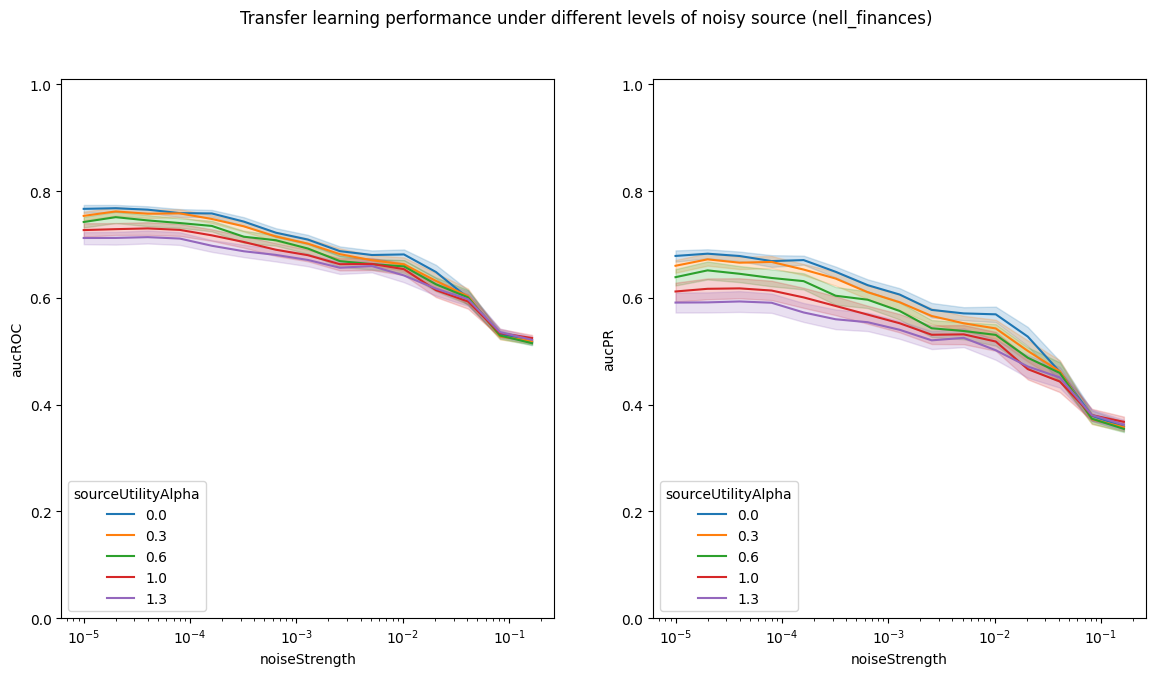

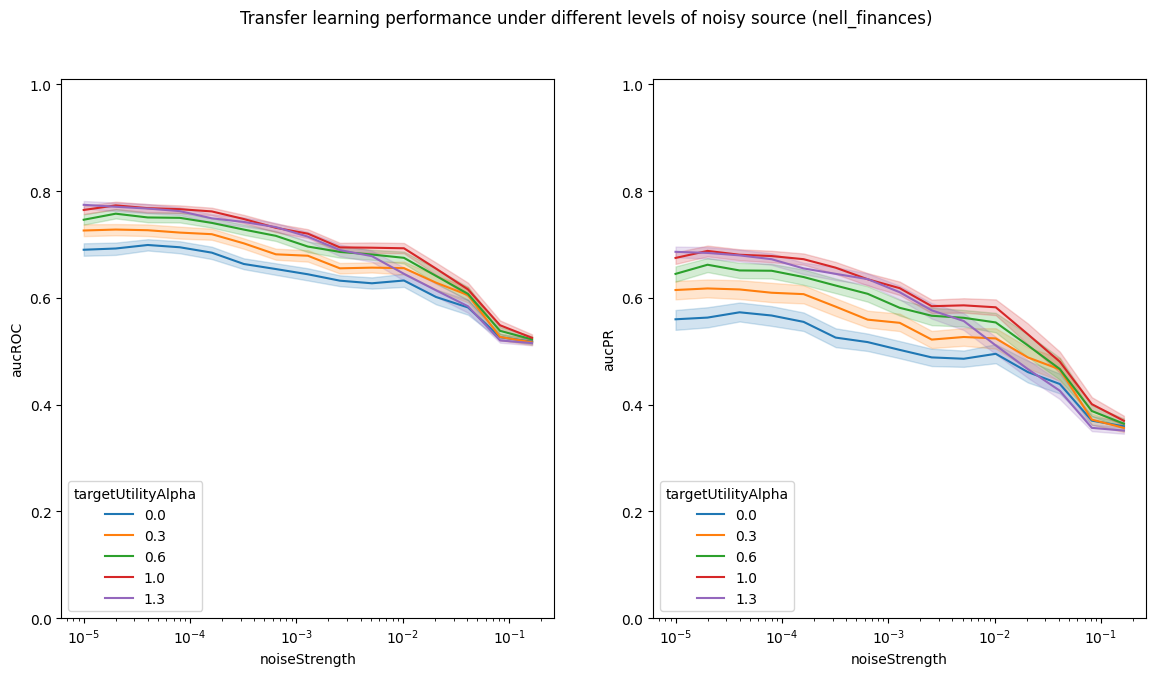

In [22]:
beta = 0
analysisVariables = runAnalysis(database = database, beta = beta)

### **Beta=0.5**

Best AUC-ROC performance:
Source noise strength: 2e-05
Source utility alpha: 0.6
Target utility alpha: 1.3
AUC-ROC: 0.81006675 +- 0.02866986003112933
AUC-PR: 0.7346365833333334 +- 0.04240952781340604


Best AUC-PR performance:
Source noise strength: 2e-05
Source utility alpha: 0.6
Target utility alpha: 1.3
AUC-ROC: 0.81006675 +- 0.02866986003112933
AUC-PR: 0.7346365833333334 +- 0.04240952781340604


Worst AUC-ROC performance:
Source noise strength: 0.08192
Source utility alpha: 1.0
Target utility alpha: 1.3
AUC-ROC: 0.5079633333333333 +- 0.019411986635878217
AUC-PR: 0.3425955 +- 0.014645307635118938


Worst AUC-PR performance:
Source noise strength: 0.08192
Source utility alpha: 1.0
Target utility alpha: 1.3
AUC-ROC: 0.5079633333333333 +- 0.019411986635878217
AUC-PR: 0.3425955 +- 0.014645307635118938


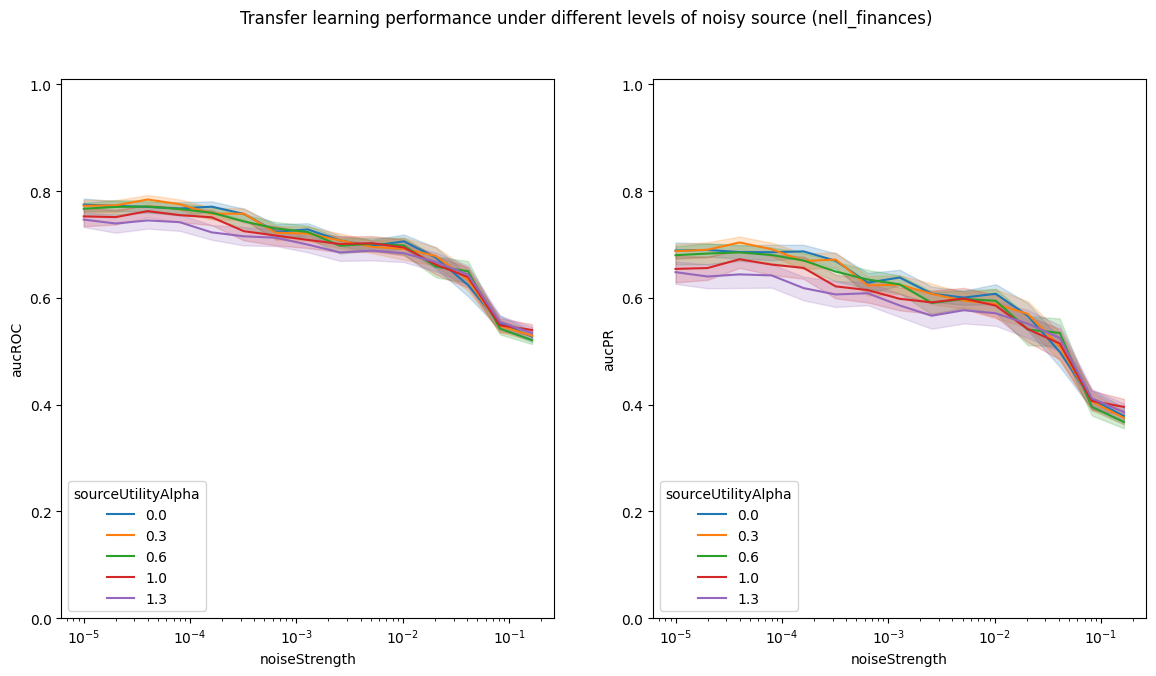

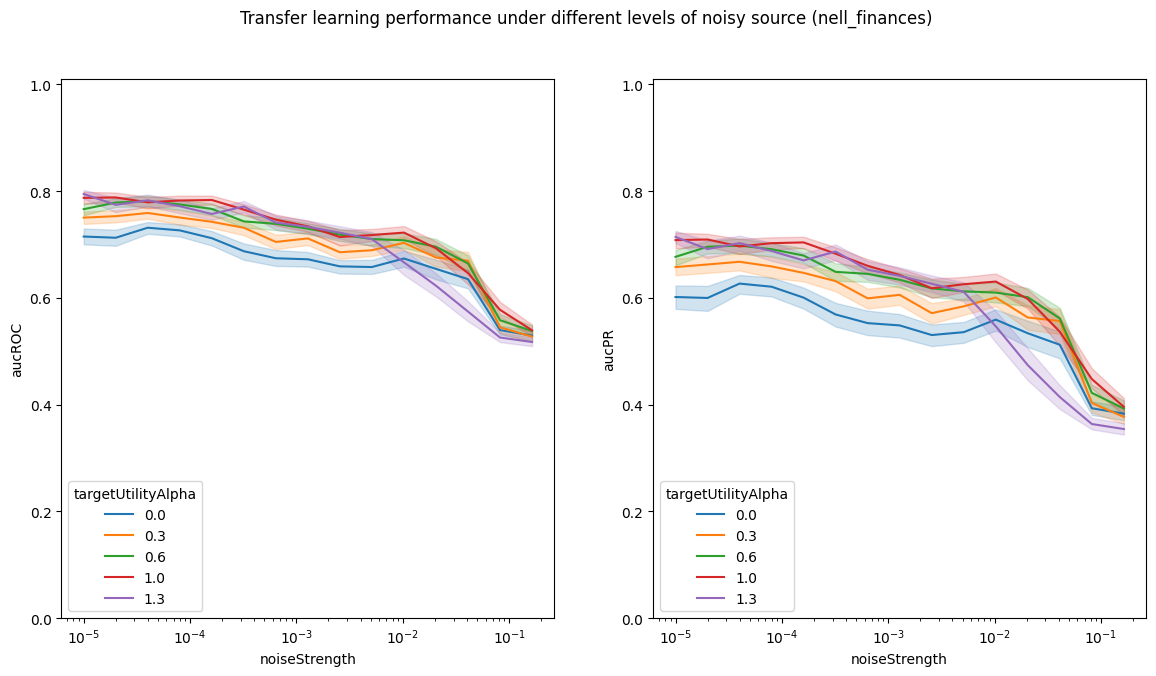

In [23]:
beta = 0.5
analysisVariables = runAnalysis(database = database, beta = beta)

### **Beta=1**

Best AUC-ROC performance:
Source noise strength: 2e-05
Source utility alpha: 1.0
Target utility alpha: 0.6
AUC-ROC: 0.8012768333333332 +- 0.031779709472421466
AUC-PR: 0.7256438333333333 +- 0.03908839415021325


Best AUC-PR performance:
Source noise strength: 2e-05
Source utility alpha: 1.0
Target utility alpha: 0.6
AUC-ROC: 0.8012768333333332 +- 0.031779709472421466
AUC-PR: 0.7256438333333333 +- 0.03908839415021325


Worst AUC-ROC performance:
Source noise strength: 0.08192
Source utility alpha: 0.6
Target utility alpha: 0.3
AUC-ROC: 0.49836166666666665 +- 0.02196422592156012
AUC-PR: 0.33840733333333334 +- 0.032036172123606356


Worst AUC-PR performance:
Source noise strength: 0.08192
Source utility alpha: 0.6
Target utility alpha: 0.3
AUC-ROC: 0.49836166666666665 +- 0.02196422592156012
AUC-PR: 0.33840733333333334 +- 0.032036172123606356


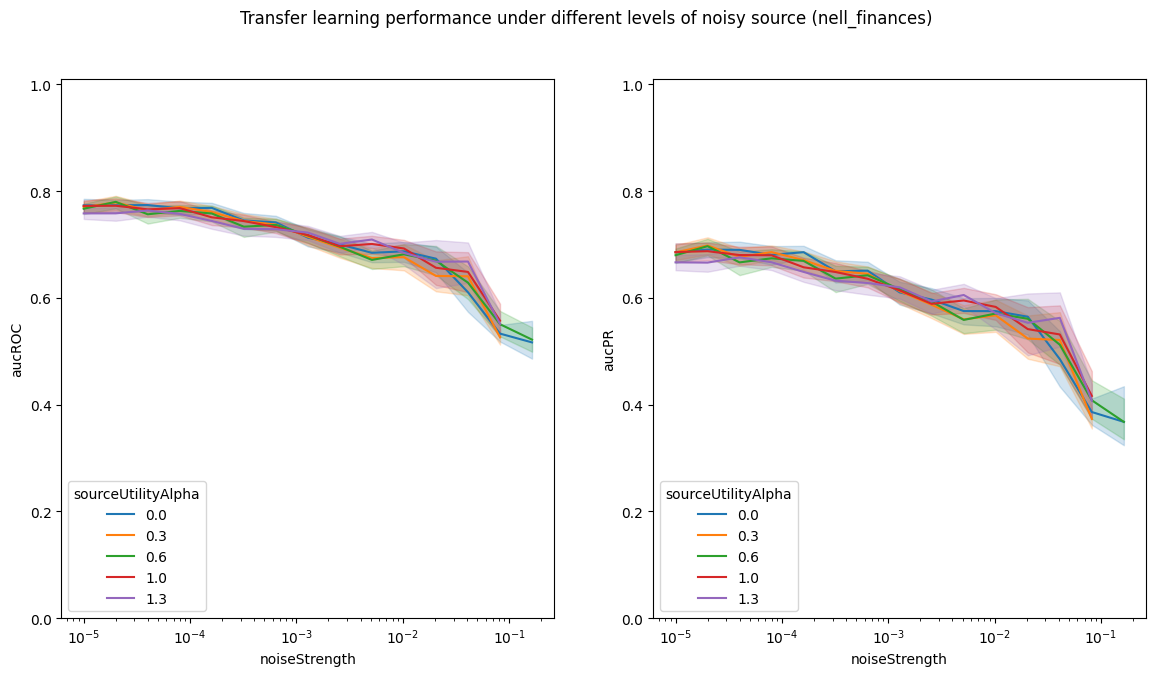

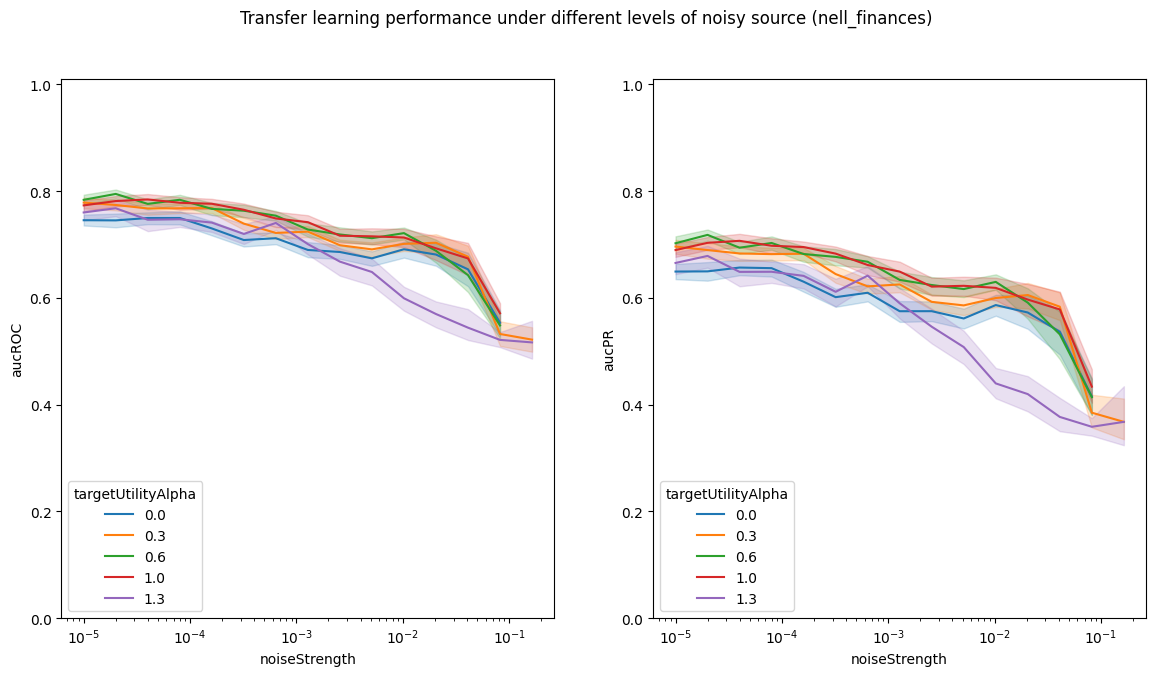

In [24]:
beta = 1
analysisVariables = runAnalysis(database = database, beta = beta)

## **NELL Sports**

In [25]:
database = "nell_sports"

### **Beta=0**

Best AUC-ROC performance:
Source noise strength: 0.00032
Source utility alpha: 0.0
Target utility alpha: 1.0
AUC-ROC: 0.9885581944444445 +- 0.006644530781324452
AUC-PR: 0.97430175 +- 0.01704897611232331


Best AUC-PR performance:
Source noise strength: 1e-05
Source utility alpha: 0.0
Target utility alpha: 0.3
AUC-ROC: 0.9876856944444445 +- 0.006867517933075323
AUC-PR: 0.9756683333333334 +- 0.018165518120093052


Worst AUC-ROC performance:
Source noise strength: 0.16384
Source utility alpha: 0.6
Target utility alpha: 0.0
AUC-ROC: 0.7415764166666666 +- 0.2983195074990548
AUC-PR: 0.6885496666666666 +- 0.3153072582047096


Worst AUC-PR performance:
Source noise strength: 0.16384
Source utility alpha: 0.6
Target utility alpha: 0.0
AUC-ROC: 0.7415764166666666 +- 0.2983195074990548
AUC-PR: 0.6885496666666666 +- 0.3153072582047096


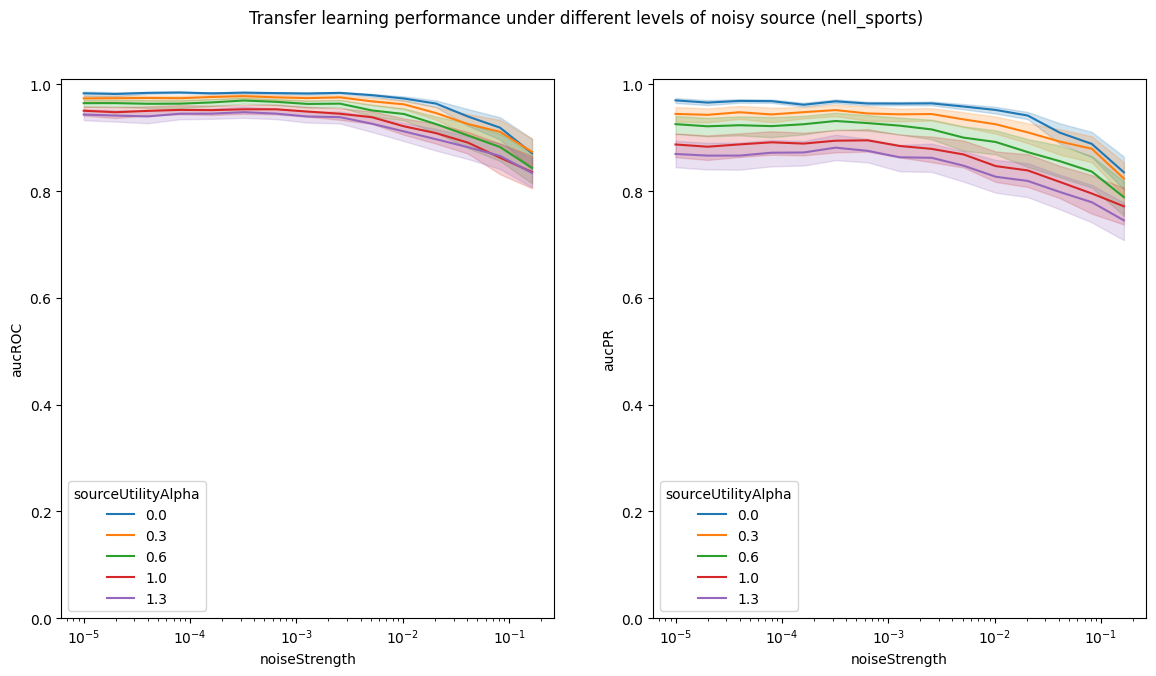

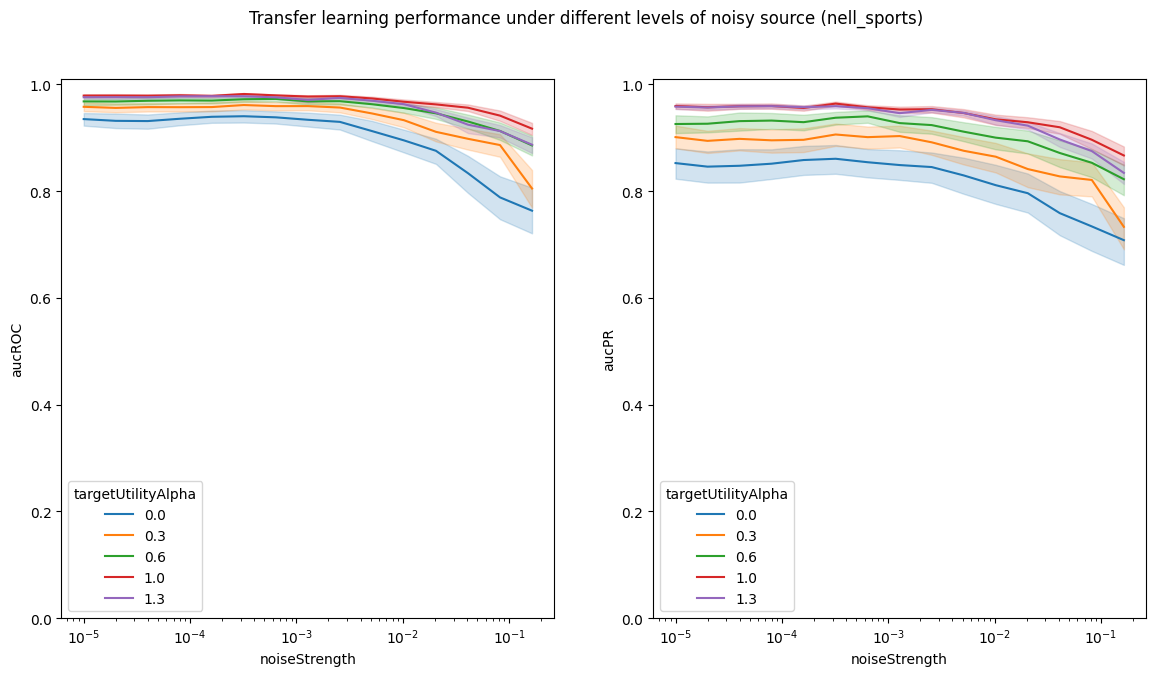

In [26]:
beta = 0
analysisVariables = runAnalysis(database = database, beta = beta)

### **Beta=0.5**

Best AUC-ROC performance:
Source noise strength: 0.00032
Source utility alpha: 0.0
Target utility alpha: 1.0
AUC-ROC: 0.991383 +- 0.00465497866414405
AUC-PR: 0.9819257499999999 +- 0.011802093590276118


Best AUC-PR performance:
Source noise strength: 4e-05
Source utility alpha: 0.3
Target utility alpha: 0.6
AUC-ROC: 0.9905348333333334 +- 0.004837203415072374
AUC-PR: 0.9833374166666666 +- 0.00834722957261142


Worst AUC-ROC performance:
Source noise strength: 0.16384
Source utility alpha: 1.3
Target utility alpha: 1.3
AUC-ROC: 0.865403 +- 0.100207665458015
AUC-PR: 0.8082668333333333 +- 0.12356703430330908


Worst AUC-PR performance:
Source noise strength: 0.16384
Source utility alpha: 1.3
Target utility alpha: 1.3
AUC-ROC: 0.865403 +- 0.100207665458015
AUC-PR: 0.8082668333333333 +- 0.12356703430330908


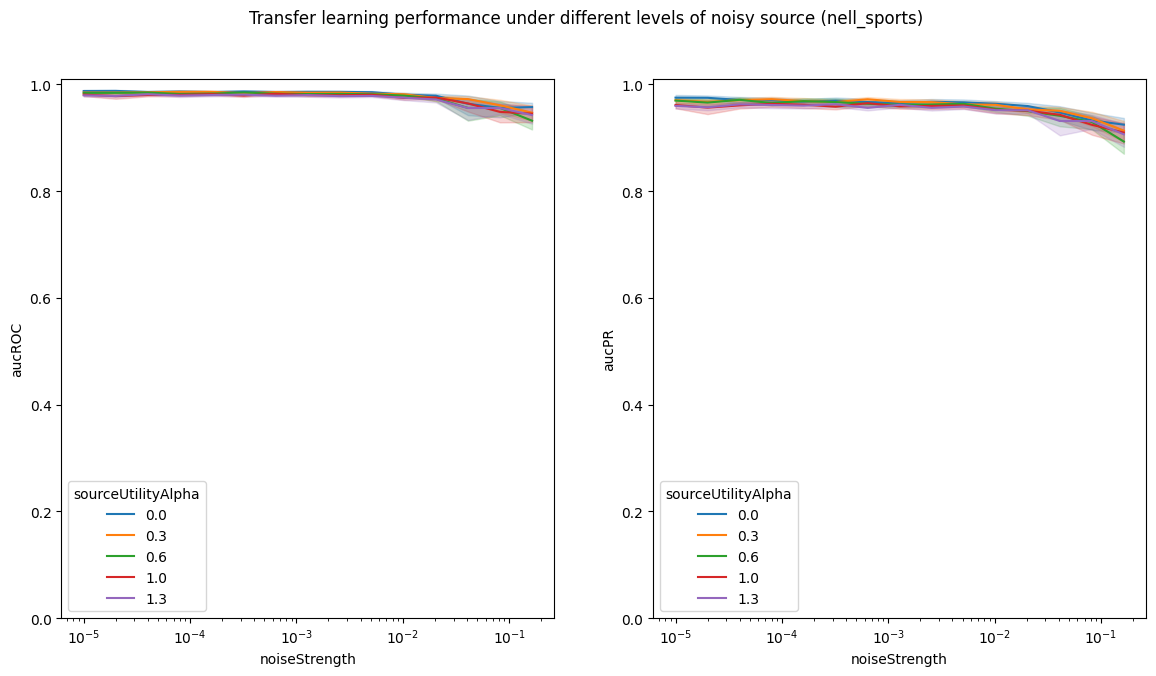

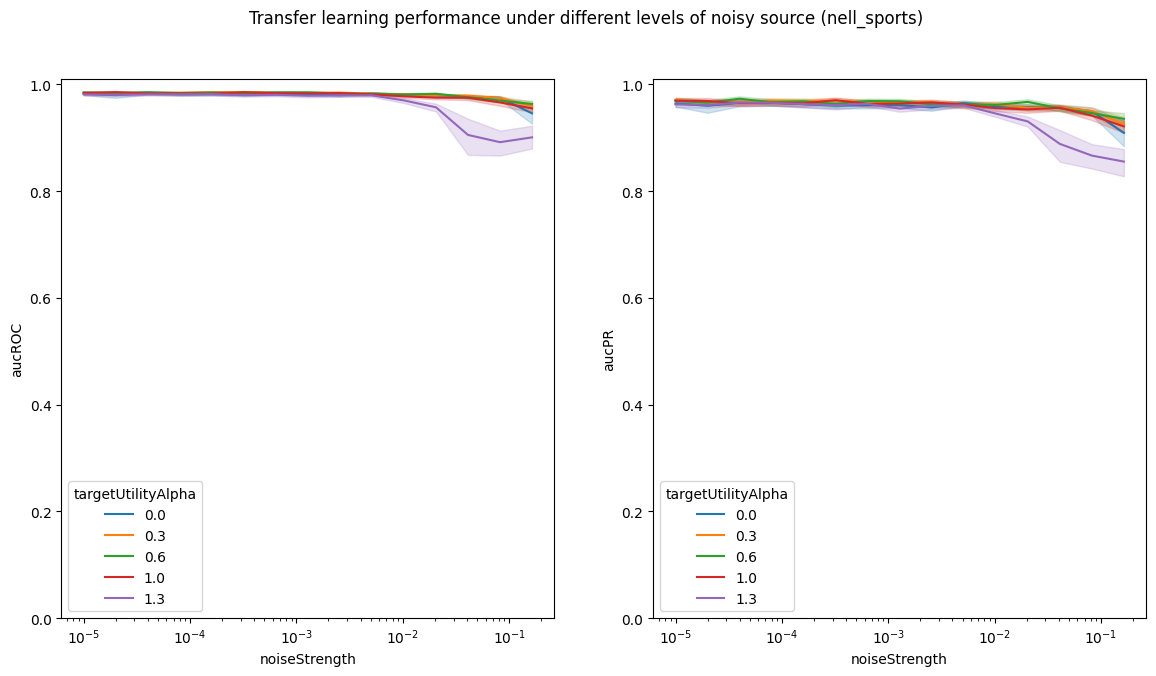

In [27]:
beta = 0.5
analysisVariables = runAnalysis(database = database, beta = beta)

### **Beta=1**

Best AUC-ROC performance:
Source noise strength: 0.00032
Source utility alpha: 0.3
Target utility alpha: 0.6
AUC-ROC: 0.9910249166666666 +- 0.005072990770350452
AUC-PR: 0.9819385 +- 0.014611306129781195


Best AUC-PR performance:
Source noise strength: 0.00032
Source utility alpha: 0.3
Target utility alpha: 0.6
AUC-ROC: 0.9910249166666666 +- 0.005072990770350452
AUC-PR: 0.9819385 +- 0.014611306129781195


Worst AUC-ROC performance:
Source noise strength: 0.16384
Source utility alpha: 1.3
Target utility alpha: 1.3
AUC-ROC: 0.8128705833333333 +- 0.1791808860856731
AUC-PR: 0.7255304166666666 +- 0.2482115985548908


Worst AUC-PR performance:
Source noise strength: 0.16384
Source utility alpha: 1.3
Target utility alpha: 1.3
AUC-ROC: 0.8128705833333333 +- 0.1791808860856731
AUC-PR: 0.7255304166666666 +- 0.2482115985548908


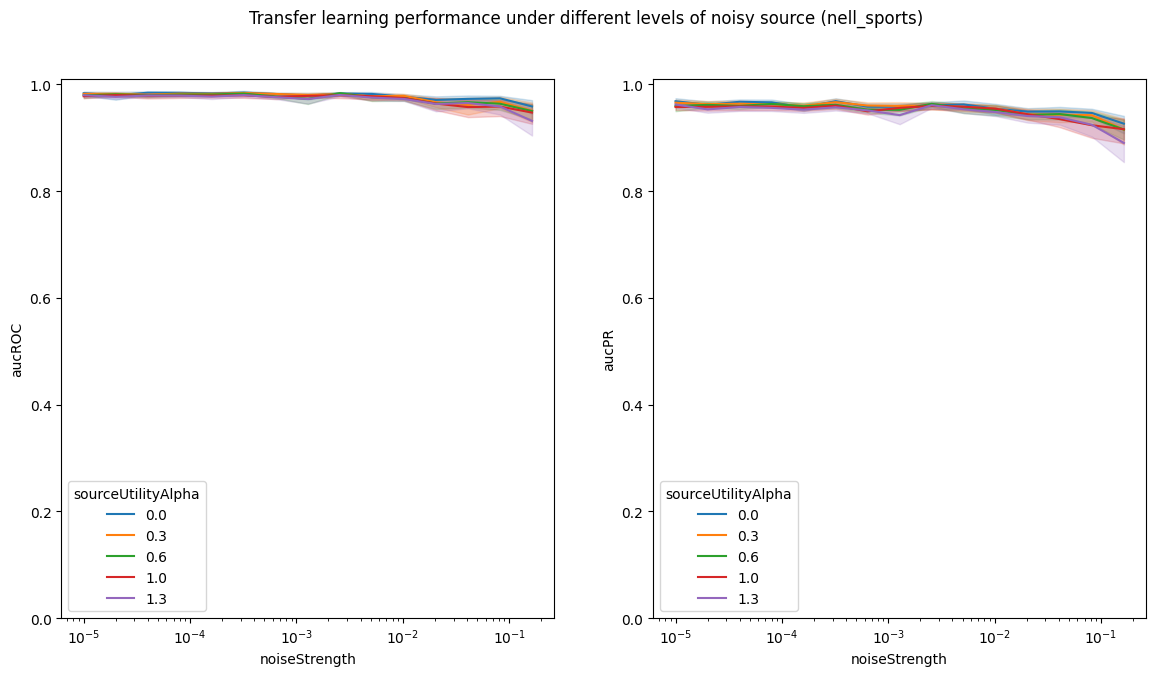

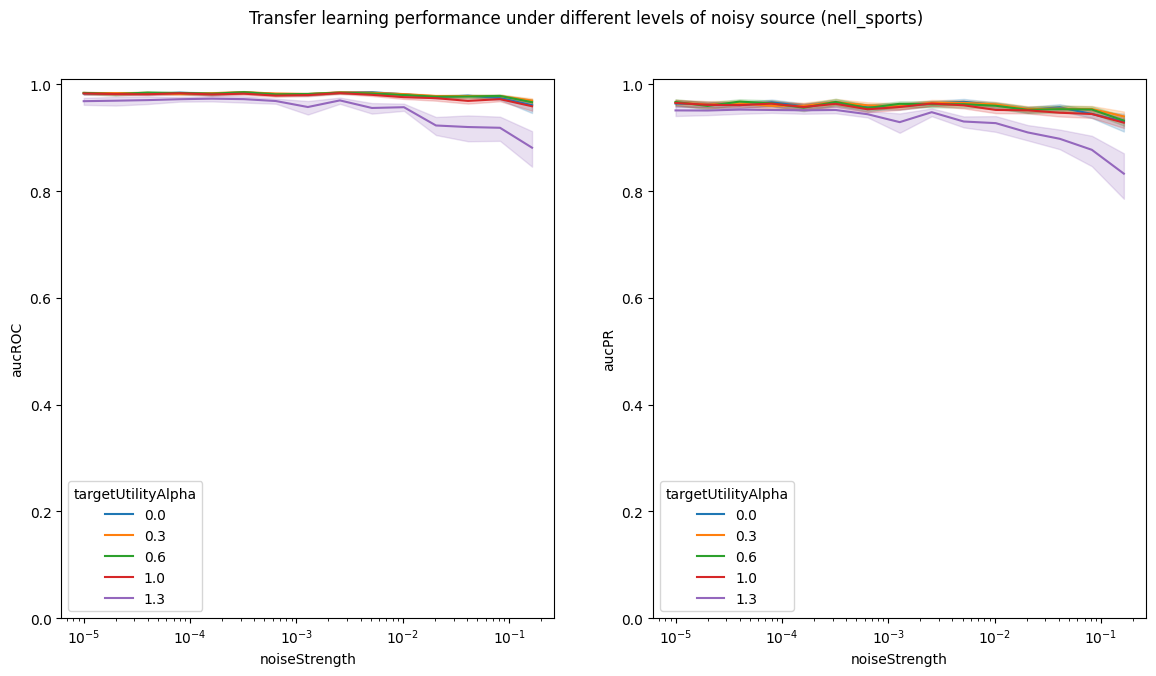

In [28]:
beta = 1
analysisVariables = runAnalysis(database = database, beta = beta)

## **Yeast**

In [29]:
database = "yeast"

### **Beta=0**

Best AUC-ROC performance:
Source noise strength: 0.00016
Source utility alpha: 0.0
Target utility alpha: 1.0
AUC-ROC: 0.9574816666666667 +- 0.0392807582700424
AUC-PR: 0.9205764583333332 +- 0.05471530934230156


Best AUC-PR performance:
Source noise strength: 0.00016
Source utility alpha: 0.0
Target utility alpha: 1.0
AUC-ROC: 0.9574816666666667 +- 0.0392807582700424
AUC-PR: 0.9205764583333332 +- 0.05471530934230156


Worst AUC-ROC performance:
Source noise strength: 0.16384
Source utility alpha: 0.6
Target utility alpha: 0.0
AUC-ROC: 0.5959667222222222 +- 0.12205238849412414
AUC-PR: 0.4506813888888889 +- 0.14224333848228993


Worst AUC-PR performance:
Source noise strength: 0.16384
Source utility alpha: 0.3
Target utility alpha: 0.0
AUC-ROC: 0.5990130833333334 +- 0.11947591021489883
AUC-PR: 0.4504513055555555 +- 0.13745033261464082


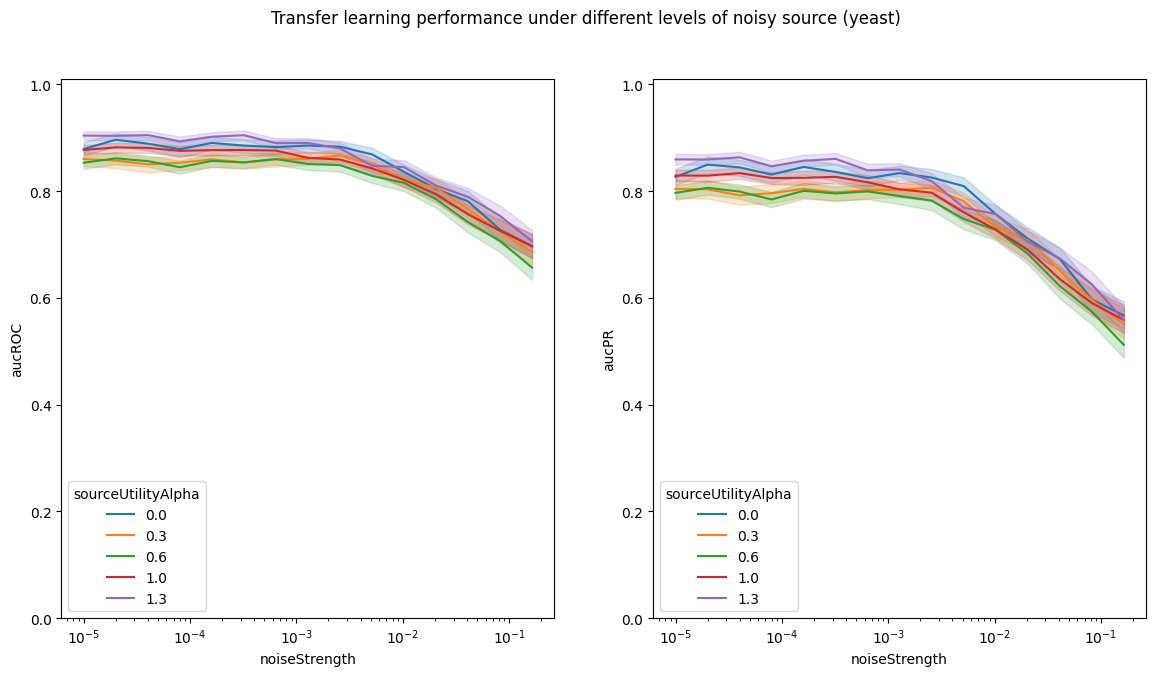

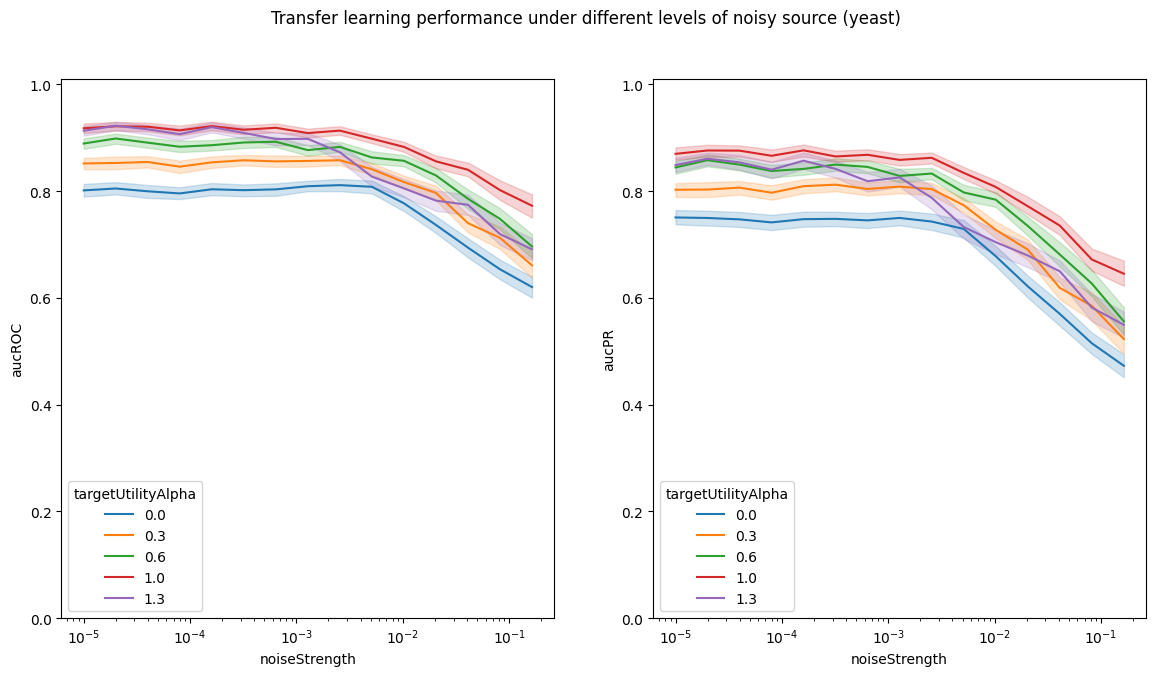

In [30]:
beta = 0
analysisVariables = runAnalysis(database = database, beta = beta)

### **Beta=0.5**

Best AUC-ROC performance:
Source noise strength: 2e-05
Source utility alpha: 0.0
Target utility alpha: 0.6
AUC-ROC: 0.9645678125 +- 0.04232507217905835
AUC-PR: 0.9387363125 +- 0.049110543186731644


Best AUC-PR performance:
Source noise strength: 4e-05
Source utility alpha: 0.0
Target utility alpha: 0.6
AUC-ROC: 0.96059175 +- 0.05656354555306212
AUC-PR: 0.939756 +- 0.07479305178067455


Worst AUC-ROC performance:
Source noise strength: 0.16384
Source utility alpha: 1.0
Target utility alpha: 1.3
AUC-ROC: 0.6641525625 +- 0.17648128262980894
AUC-PR: 0.4946209375 +- 0.18077227023983106


Worst AUC-PR performance:
Source noise strength: 0.16384
Source utility alpha: 1.0
Target utility alpha: 1.3
AUC-ROC: 0.6641525625 +- 0.17648128262980894
AUC-PR: 0.4946209375 +- 0.18077227023983106


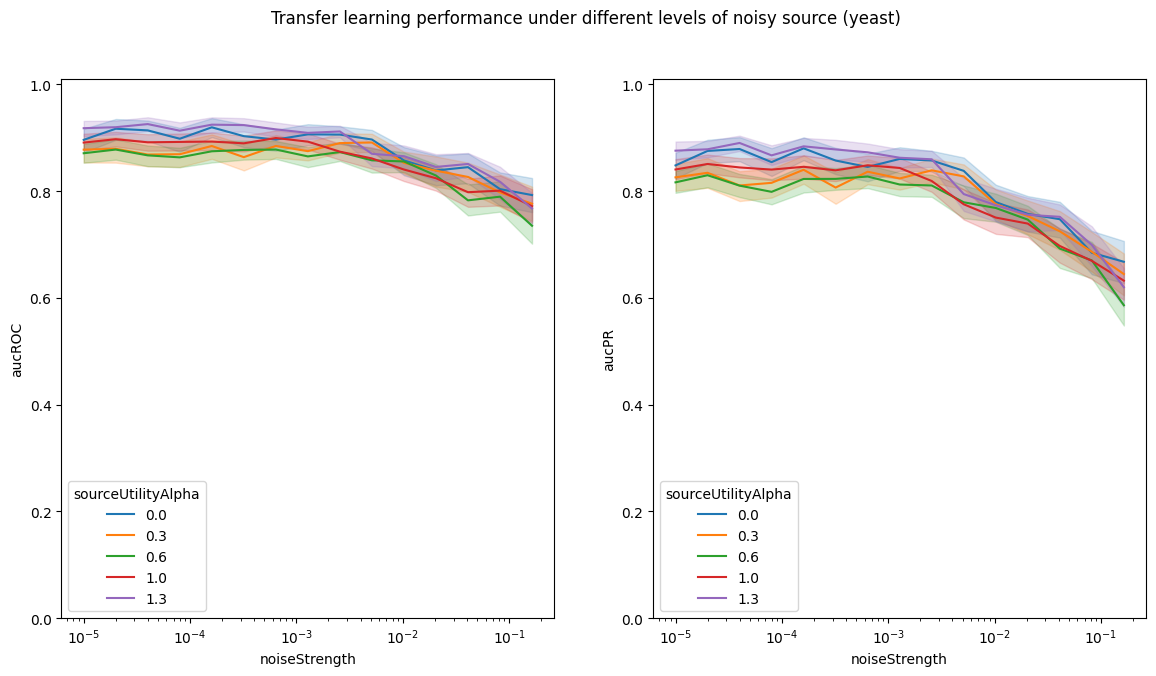

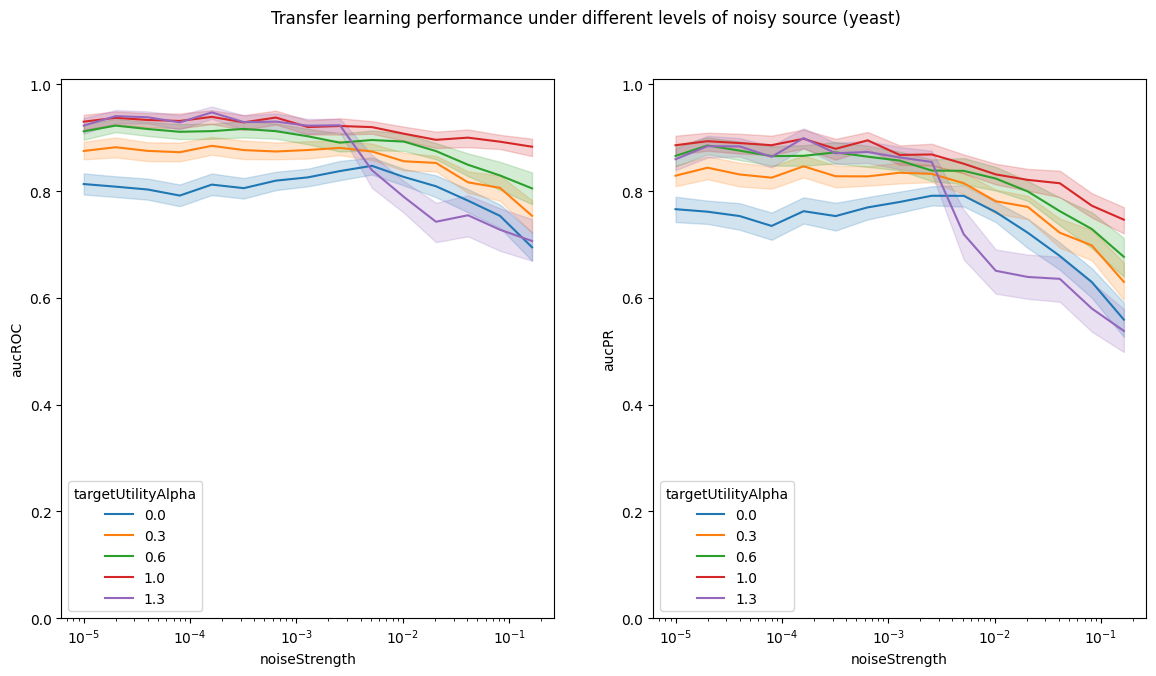

In [31]:
beta = 0.5
analysisVariables = runAnalysis(database = database, beta = beta)

### **Beta=1**

Best AUC-ROC performance:
Source noise strength: 2e-05
Source utility alpha: 0.0
Target utility alpha: 0.6
AUC-ROC: 0.9625636875 +- 0.03409337567273885
AUC-PR: 0.9209023125 +- 0.04293381130021531


Best AUC-PR performance:
Source noise strength: 1e-05
Source utility alpha: 1.3
Target utility alpha: 0.3
AUC-ROC: 0.959767625 +- 0.0348270770615336
AUC-PR: 0.929464625 +- 0.04330006887119234


Worst AUC-ROC performance:
Source noise strength: 0.16384
Source utility alpha: 1.3
Target utility alpha: 1.3
AUC-ROC: 0.4984995 +- 0.012523290022993147
AUC-PR: 0.32863275000000003 +- 0.006756320565465621


Worst AUC-PR performance:
Source noise strength: 0.16384
Source utility alpha: 1.3
Target utility alpha: 1.3
AUC-ROC: 0.4984995 +- 0.012523290022993147
AUC-PR: 0.32863275000000003 +- 0.006756320565465621


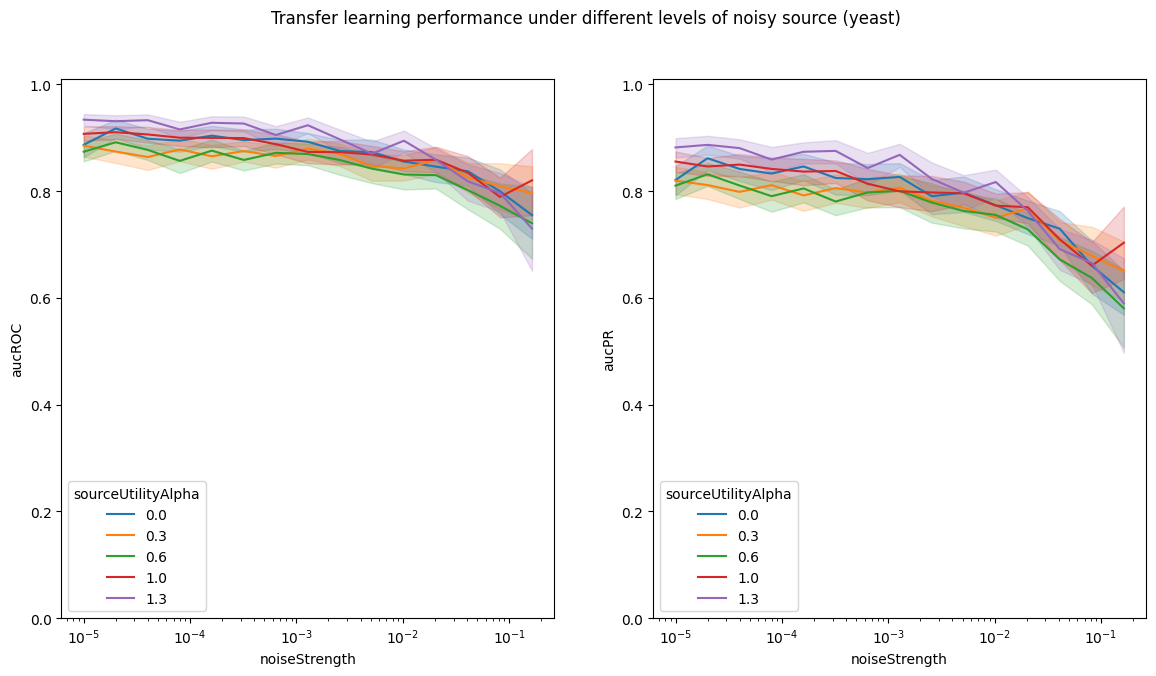

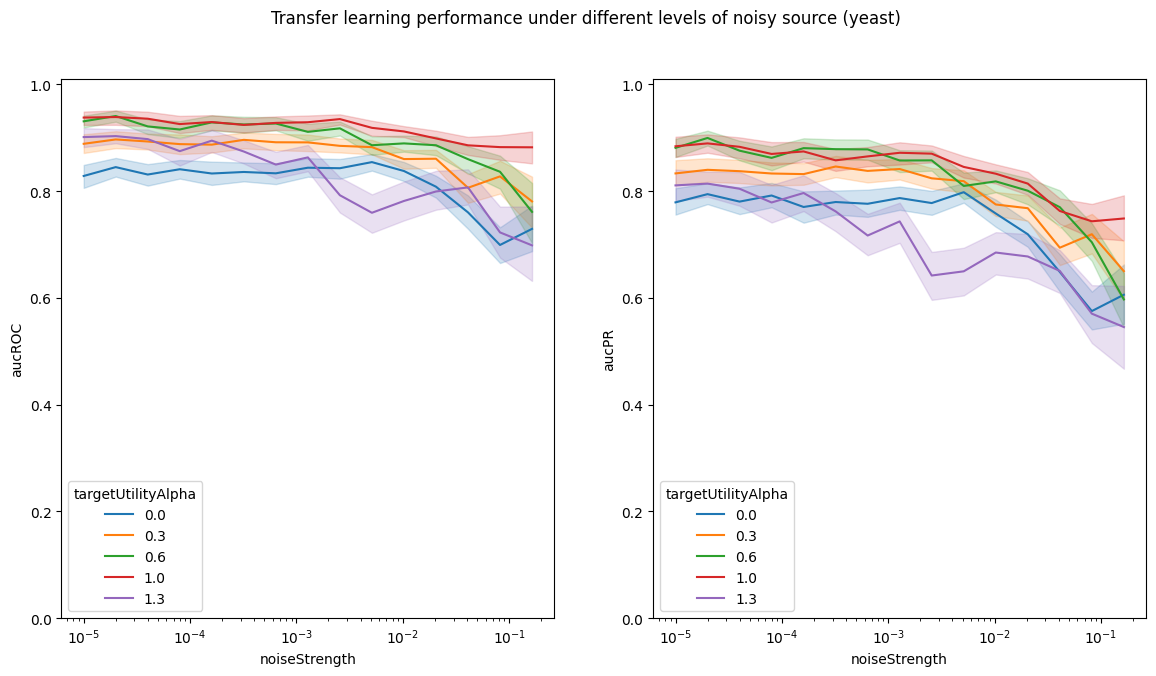

In [32]:
beta = 1
analysisVariables = runAnalysis(database = database, beta = beta)

In [ ]:
plotUtilityVsPredictedProb("518d7b3f7a41058e2df87f8dac62c29b0dafcea505e00f1c7825791ed2c14018")

In [ ]:
plotUtilityVsPredictedProb("c7dfd1b000f3bcc46fa27d0baea6edea5cf979eac7c2b002ea0518e05b50aeb9")

In [ ]:
# Correlation between utility and AUC
database = "nell_finances"
targetUtilityAlpha = 0
aucUtilityPlotDF = pd.melt(
    utilityAlphaDF.drop(["experimentID"], axis = 1),
    id_vars = ["id", "database", "fold", "targetUtilityAlpha"],
    value_name = f"utility@targetUtilityAlpha={targetUtilityAlpha}",
    var_name = "evaluatedTargetUtilityAlpha"
)

aucUtilityPlotDF = aucUtilityPlotDF[
    (aucUtilityPlotDF.database == database) &
    (aucUtilityPlotDF.targetUtilityAlpha == targetUtilityAlpha)
]
aucUtilityPlotDF = pd.merge(
    aucUtilityPlotDF[
        (aucUtilityPlotDF.database == database)
    ],
    experimentsResultsDF[["id", "sourceUtilityAlpha"]],
    on = "id", 
    how = "left"
)

aucUtilityPlotDF["evaluatedTargetUtilityAlpha"] = aucUtilityPlotDF.evaluatedTargetUtilityAlpha.apply(
    lambda utilityAlpha: float(utilityAlpha.replace("utility@targetAlpha_", ""))
)
aucUtilityPlotDF = aucUtilityPlotDF[aucUtilityPlotDF.targetUtilityAlpha == aucUtilityPlotDF.evaluatedTargetUtilityAlpha]

aucUtilityPlotDF = pd.merge(
    metricsDF.rename(columns = {"experimentID": "id"}),
    aucUtilityPlotDF,
    on = ["id", "fold"],
    how = "inner"
)

aucUtilityPlotDF.head()

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,8))

sns.scatterplot(
    data = aucUtilityPlotDF,
    x = f"utility@targetUtilityAlpha={targetUtilityAlpha}",
    y = "aucROC",
    hue = "sourceUtilityAlpha",
    palette = sns.color_palette(),
    ax = axs[0]
)
axs[0].set_ylim(0,1)

sns.scatterplot(
    data = aucUtilityPlotDF,
    x = f"utility@targetUtilityAlpha={targetUtilityAlpha}",
    y = "aucPR",
    hue = "sourceUtilityAlpha",
    palette = sns.color_palette(),
    ax = axs[1]
)
axs[1].set_ylim(0,1)

correlation_aucROC_utility = pearsonr(aucUtilityPlotDF[f"utility@targetUtilityAlpha={targetUtilityAlpha}"], aucUtilityPlotDF.aucROC)
print(f"Pearson Correlation between AUC ROC and Utility at targetUtilityAlpha={targetUtilityAlpha}:")
print(correlation_aucROC_utility)

print()

correlation_aucPR_utility = pearsonr(aucUtilityPlotDF[f"utility@targetUtilityAlpha={targetUtilityAlpha}"], aucUtilityPlotDF.aucPR)
print(f"Pearson Correlation between AUC PR and Utility at targetUtilityAlpha={targetUtilityAlpha}:")
print(correlation_aucPR_utility)